# 0. Setup

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, train_test_split
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
data = pd.read_csv("mlgroup_train.csv")

#storing this one away until the very end...we will only take 1 honest attempt at it
data_test = pd.read_csv("mlgroup_test.csv")

data.head()

id  Age     BusinessTravel  DailyRate              Department  \
0   0   36  Travel_Frequently        599  Research & Development   
1   1   35      Travel_Rarely        921                   Sales   
2   2   32      Travel_Rarely        718                   Sales   
3   3   38      Travel_Rarely       1488  Research & Development   
4   4   50      Travel_Rarely       1017  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  \
0                24          3        Medical              1   
1                 8          3          Other              1   
2                26          3      Marketing              1   
3                 2          3        Medical              1   
4                 5          4        Medical              1   

   EnvironmentSatisfaction  ... StandardHours  StockOptionLevel  \
0                        4  ...            80                 1   
1                        1  ...            80                 1   
2                        3  ...            80                 2   
3                        3  ...            80                 0   
4                        2  ...            80                 0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 10                      2               3              10   
1                  4                      3               3               4   
2                  4                      3               3               3   
3                 15                      1               1               6   
4                 31                      0               3              31   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  
0                  0                        7                     8          0  
1                  2                        0                     3          0  
2                  2                        1                     2          0  
3                  0                        0                     2          0  
4                 14                        4                    10          1  

[5 rows x 35 columns]

In [4]:
len(data)

1677

# 1. Data Exploration

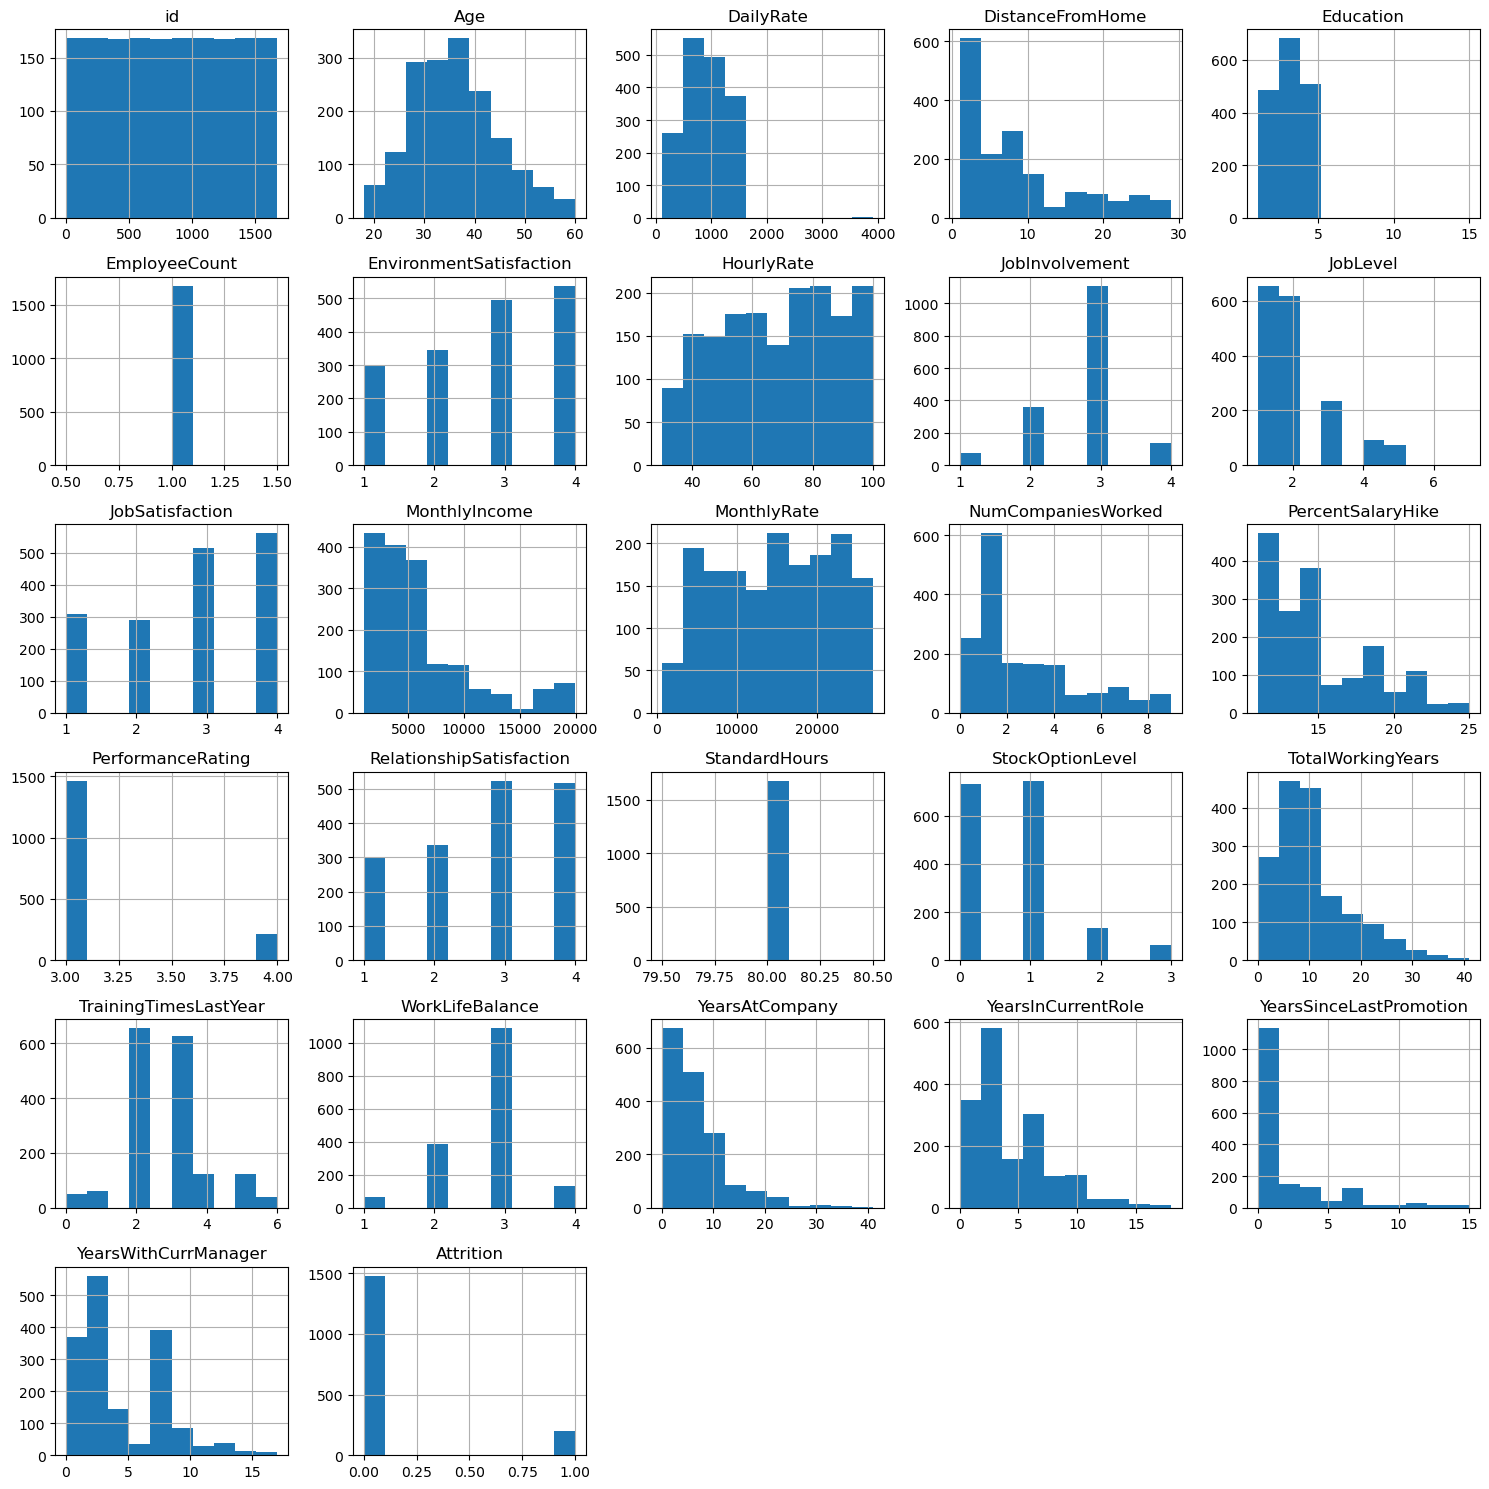

In [5]:
# Visualize the histogram of the different columns
data.hist(figsize = (15,15))
plt.tight_layout()
plt.show()

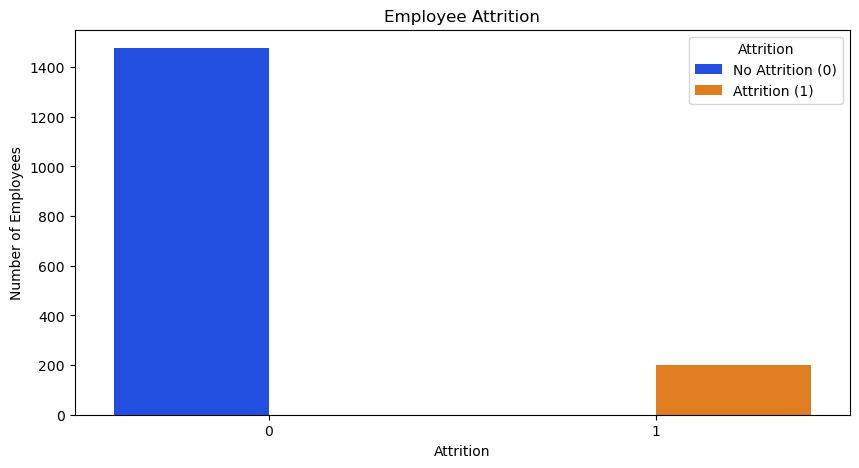

In [6]:
#Univariate Analysis

colors = sns.color_palette('bright', n_colors=2)
plt.figure(figsize=(10,5))
sns.countplot(x='Attrition', data=data, hue='Attrition', palette=colors)
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.title('Employee Attrition')
plt.legend(title='Attrition', labels=['No Attrition (0)', 'Attrition (1)'])
plt.show()

In [7]:
pd.DataFrame(data['Attrition'].value_counts())

Attrition
0       1477
1        200

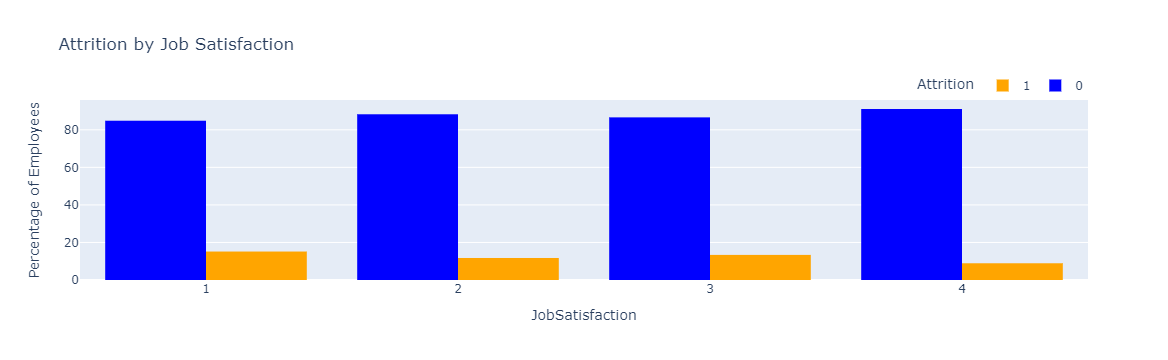

In [8]:
# BIVARIATE ANALYSIS
# Exploring if Job Satisfaction plays an important role in Attrition
job_sat_fig = px.histogram(data_frame=data,
             x='JobSatisfaction', 
             color='Attrition',
             barmode='group',
             barnorm='percent',
             color_discrete_sequence=['blue', 'orange'],
             title='Attrition by Job Satisfaction',
             labels={'1': 'Attrition', '0': 'No Attrition'}
)

job_sat_fig.update_layout(
    yaxis_title='Percentage of Employees',
    legend=dict(
        title='Attrition',
        orientation='h',
        yanchor='bottom',
        y=1,
        xanchor='right',
        x=1,
        traceorder='reversed'
    )
)

job_sat_fig.show()

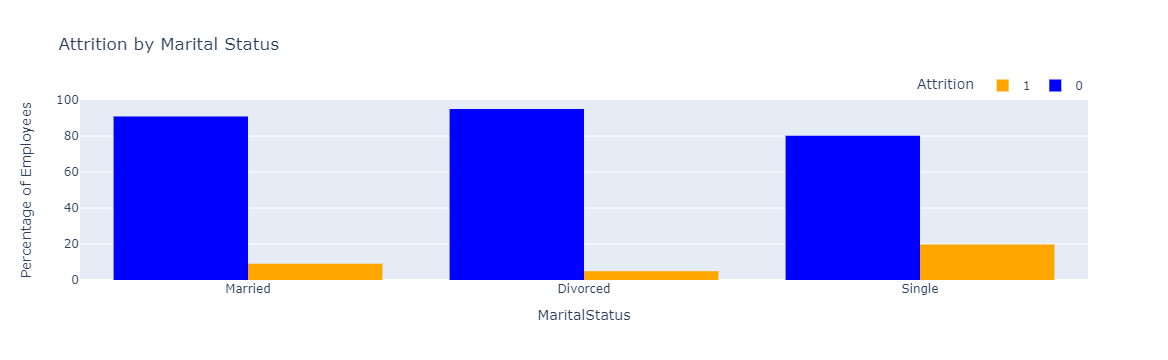

In [9]:
#BIVARIATE ANALYSIS
# Explore Attrition based on Marital Status
mar_stat_fig = px.histogram(data_frame=data,
             x='MaritalStatus',
             color='Attrition',
             barmode='group',
             barnorm='percent',
             color_discrete_sequence=['blue', 'orange'],
             title='Attrition by Marital Status',
             labels={'1': 'Attrition', '0': 'No Attrition'})


mar_stat_fig.update_layout(
    yaxis_title='Percentage of Employees',
    legend=dict(
        title='Attrition',
        orientation='h',
        yanchor='bottom',
        y=1,
        xanchor='right',
        x=1,
        traceorder='reversed'
    )
)

mar_stat_fig.show()

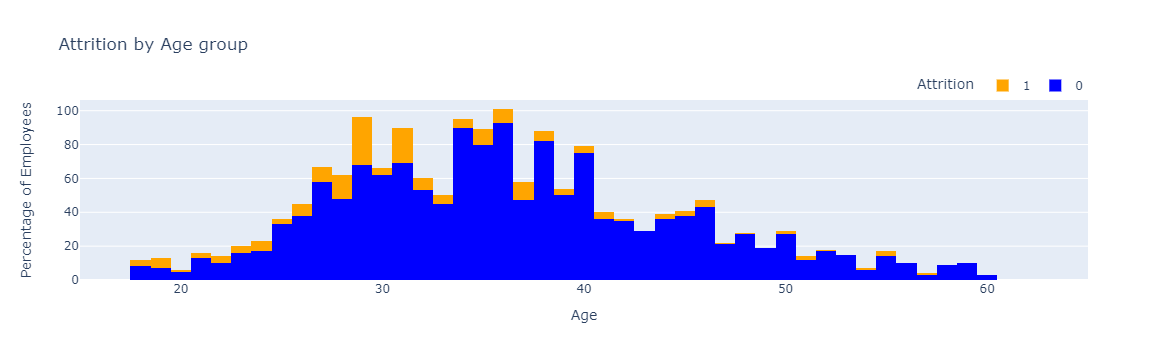

In [10]:
#BIVARIATE ANALYSIS
# Explore Attrition based on age
age_fig = px.histogram(data_frame=data,
             x='Age',
             color='Attrition',
             histfunc='count', 
             title='Attrition by Age group',
             barmode='relative',
             color_discrete_sequence=['blue', 'orange'],
             range_x=[15,65],
             labels={'1': 'Attrition', '0': 'No Attrition'})

age_fig.update_layout(
    yaxis_title='Percentage of Employees',
    legend=dict(
        title='Attrition',
        orientation='h',
        yanchor='bottom',
        y=1,
        xanchor='right',
        x=1,
        traceorder='reversed'
    )
)

age_fig.show()

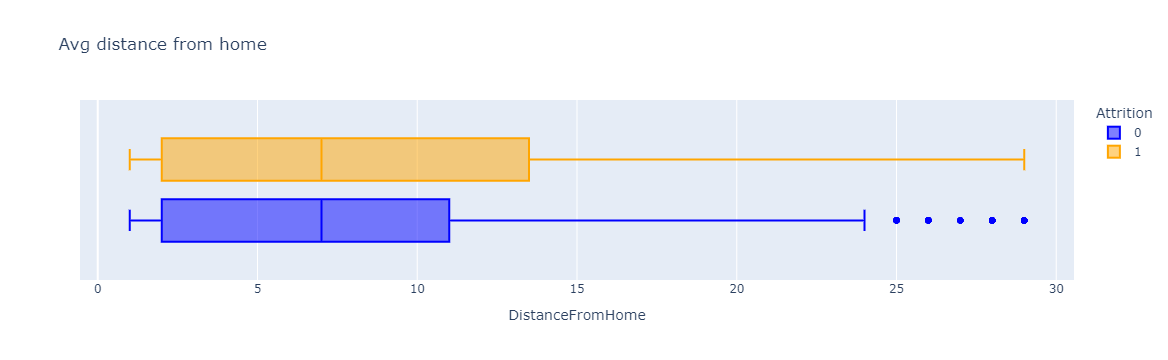

In [11]:
# BIVARIATE ANALYSIS
# Explore Attrition compared to distance from home
dist_home_fig = px.box(data_frame=data,
       x='DistanceFromHome',
       color='Attrition',
       title='Avg distance from home',
       color_discrete_sequence=['blue', 'orange'],
       template='plotly')

dist_home_fig.show()

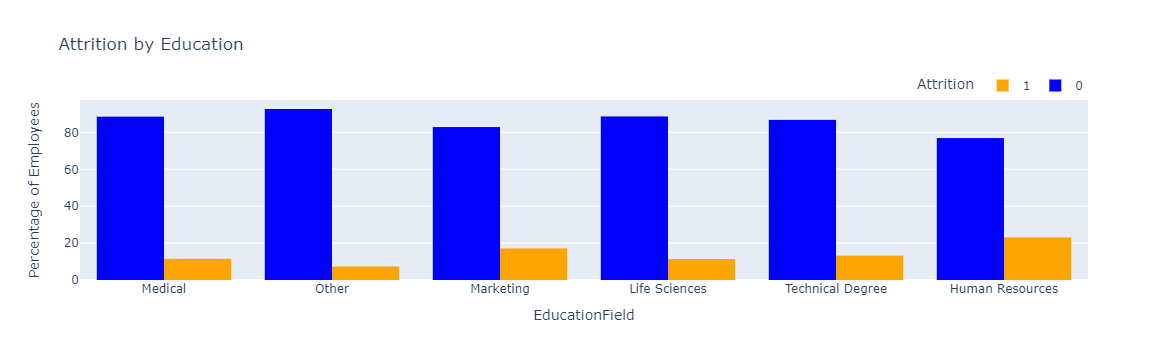

In [12]:
#BIVARIATE ANALYSIS
# Explore Attrition based on Education
educ_fig = px.histogram(data_frame=data,
             x='EducationField',
             color='Attrition',
             barmode='group',
             barnorm='percent',
             color_discrete_sequence=['blue', 'orange'],
             title='Attrition by Education',
             labels={'1': 'Attrition', '0': 'No Attrition'}
            )

educ_fig.update_layout(
    yaxis_title='Percentage of Employees',
    legend=dict(
        title='Attrition',
        orientation='h',
        yanchor='bottom',
        y=1,
        xanchor='right',
        x=1,
        traceorder='reversed'
    )
)

educ_fig.show()

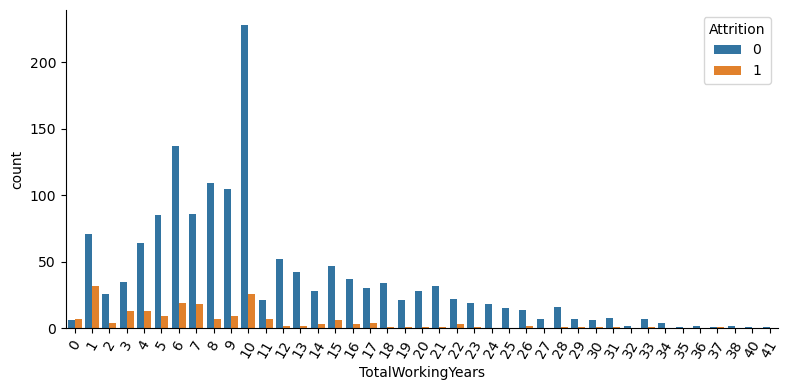

In [13]:
#BIVARIATE ANALYSIS
# Exploring if Total Working Years plays an important role in Attrition
sns.catplot(
    x = 'TotalWorkingYears',
    hue = 'Attrition',
    data = data,
    kind = 'count',
    height = 4,
    aspect = 2,
    legend = False
)

plt.legend(loc = 'upper right', title = 'Attrition')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

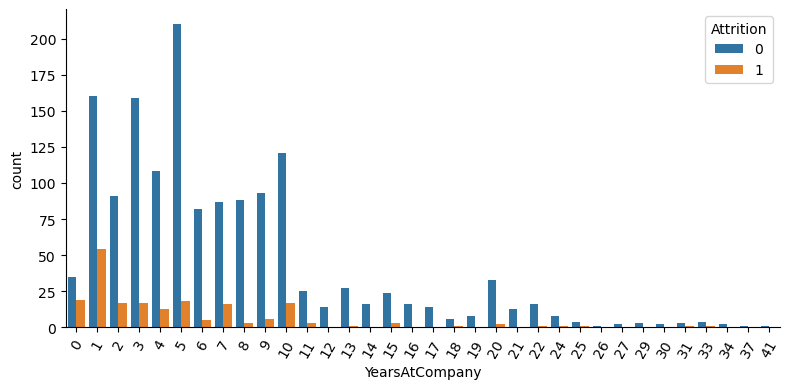

In [14]:
#BIVARIATE ANALYSIS
# Exploring if Years at Company plays an important role in Attrition
sns.catplot(
    x = 'YearsAtCompany',
    hue = 'Attrition',
    data = data,
    kind = 'count',
    height = 4,
    aspect = 2,
    legend = False
)

plt.legend(loc = 'upper right', title = 'Attrition')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

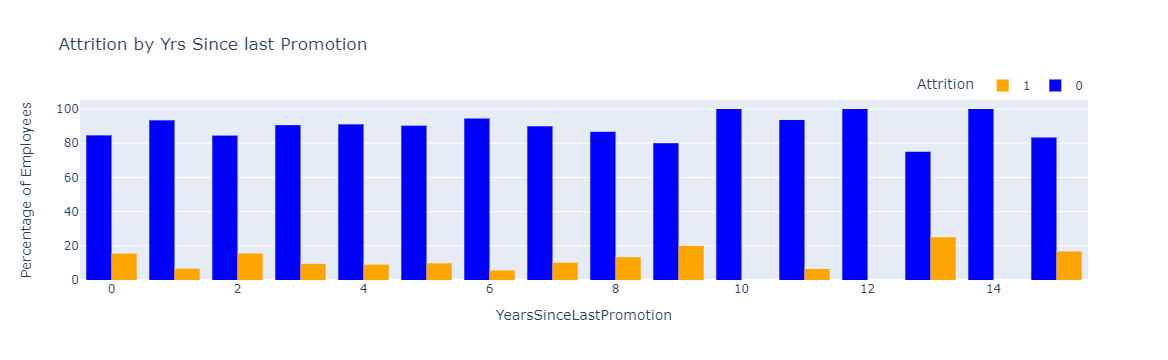

In [15]:
#BIVARIATE ANALYSIS
# Exploring if Years since last promotion plays an important role in Attrition
last_promotion_fig = px.histogram(data_frame=data,
             x='YearsSinceLastPromotion',
             color='Attrition',
             barmode='group',
             barnorm='percent',
             color_discrete_sequence=['blue', 'orange'],
             title='Attrition by Yrs Since last Promotion',
             labels={'1': 'Attrition', '0': 'No Attrition'}
)

last_promotion_fig.update_layout(
    yaxis_title='Percentage of Employees',
    legend=dict(
        title='Attrition',
        orientation='h',
        yanchor='bottom',
        y=1,
        xanchor='right',
        x=1,
        traceorder='reversed'
    )
)

last_promotion_fig.show()

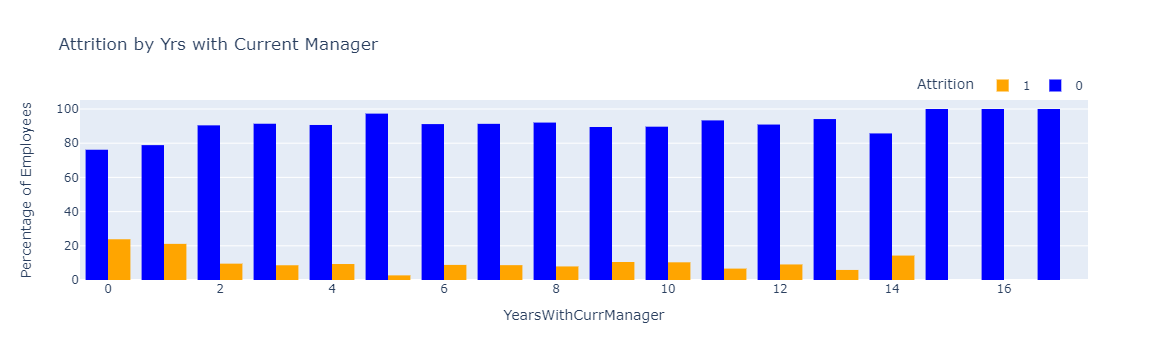

In [16]:
#BIVARIATE ANAlYSIS
# Explore of Yrs with Current Manager affects Attrition
current_mag_fig = px.histogram(data_frame=data,
             x='YearsWithCurrManager',
             color='Attrition',
             barmode='group',
             barnorm='percent',
             color_discrete_sequence=['blue', 'orange'],
             title='Attrition by Yrs with Current Manager',
             labels={'1': 'Attrition', '0': 'No Attrition'}
)

current_mag_fig.update_layout(
    yaxis_title='Percentage of Employees',
    legend=dict(
        title='Attrition',
        orientation='h',
        yanchor='bottom',
        y=1,
        xanchor='right',
        x=1,
        traceorder='reversed'
    )
)

current_mag_fig.show()

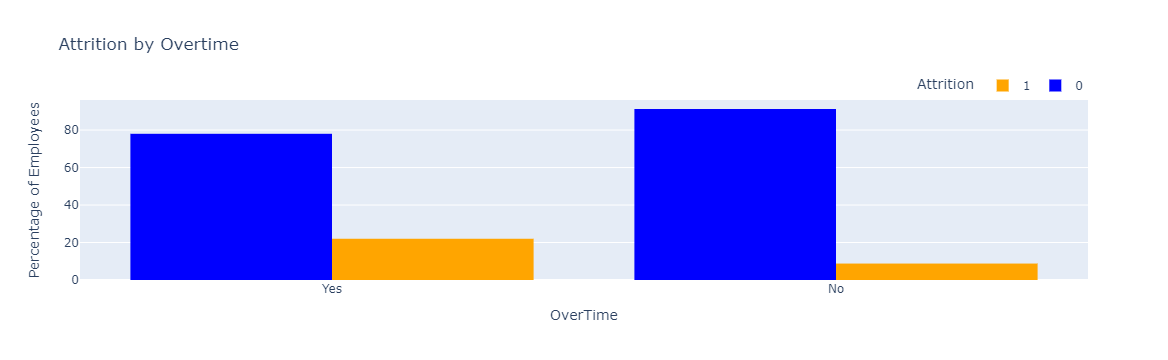

In [17]:
#BIVARIATE ANAlYSIS
# Explore of Stock affects Attrition
current_mag_fig = px.histogram(data_frame=data,
             x='OverTime',
             color='Attrition',
             barmode='group',
             barnorm='percent',
             color_discrete_sequence=['blue', 'orange'],
             title='Attrition by Overtime',
             labels={'1': 'Attrition', '0': 'No Attrition'}
)

current_mag_fig.update_layout(
    yaxis_title='Percentage of Employees',
    legend=dict(
        title='Attrition',
        orientation='h',
        yanchor='bottom',
        y=1,
        xanchor='right',
        x=1,
        traceorder='reversed'
    )
)

current_mag_fig.show()

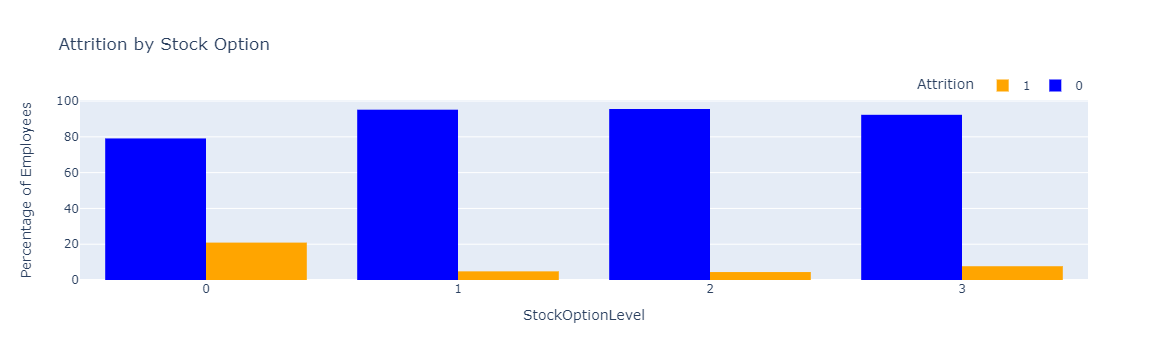

In [18]:
#BIVARIATE ANAlYSIS
# Explore of Stock affects Attrition
current_mag_fig = px.histogram(data_frame=data,
             x='StockOptionLevel',
             color='Attrition',
             barmode='group',
             barnorm='percent',
             color_discrete_sequence=['blue', 'orange'],
             title='Attrition by Stock Option',
             labels={'1': 'Attrition', '0': 'No Attrition'}
)

current_mag_fig.update_layout(
    yaxis_title='Percentage of Employees',
    legend=dict(
        title='Attrition',
        orientation='h',
        yanchor='bottom',
        y=1,
        xanchor='right',
        x=1,
        traceorder='reversed'
    )
)

current_mag_fig.show()

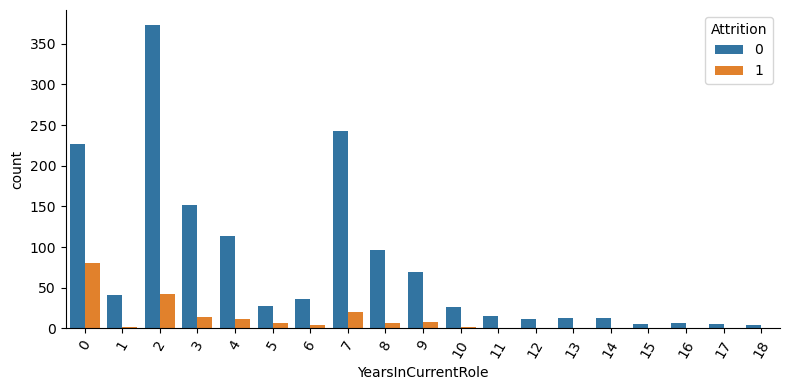

In [19]:
#BIVARIATE ANALYSIS
# Exploring if Years in current role plays an important role in Attrition
sns.catplot(
    x = 'YearsInCurrentRole',
    hue = 'Attrition',
    data = data,
    kind = 'count',
    height = 4,
    aspect = 2,
    legend = False
)

plt.legend(loc = 'upper right', title = 'Attrition')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

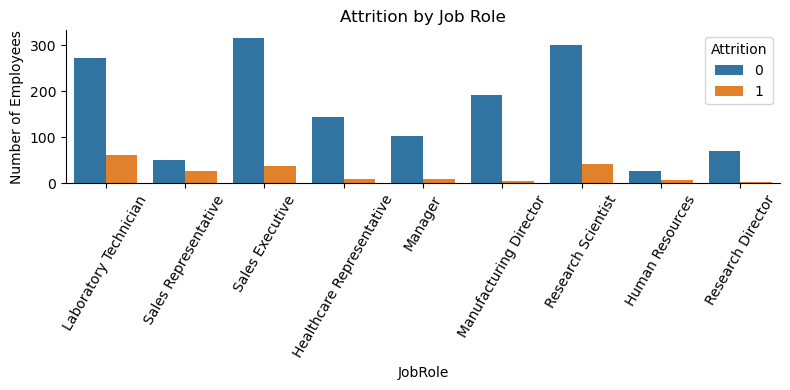

In [20]:
#MULTIVARIATE ANALYSIS (NEXT 2 GRAPHS)
# Explore Attrition based on Job Role
sns.catplot(
    x = 'JobRole',
    hue = 'Attrition',
    data = data,
    kind = 'count',
    height = 4,
    aspect = 2,
    legend = False
)

plt.legend(loc = 'upper right', title = 'Attrition')
plt.xticks(rotation=60)
plt.title("Attrition by Job Role")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.show()

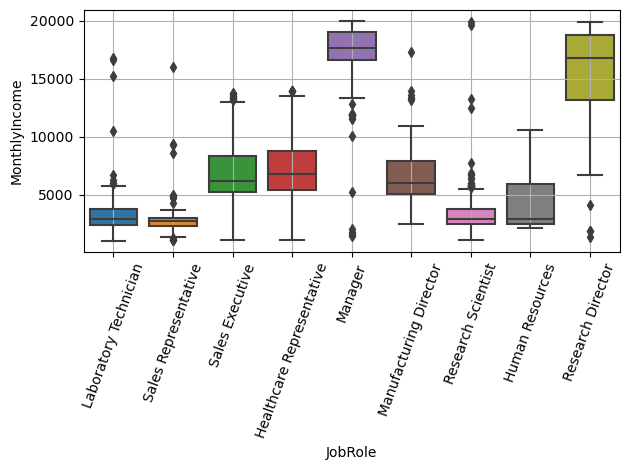

In [21]:
# Exploring the relation between Monthly Income and Job Role and Attrition (based on graph above)
sns.boxplot(
    y = data['MonthlyIncome'],
    x = data['JobRole'],
)

plt.grid(True, alpha = 1)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show() 

***End of the Data Explore Section***

# 2. Feature Engineering

In [22]:
#splitting values into X and y
X = data.drop(columns = "Attrition")
y = data["Attrition"]

In [23]:
#creating a validating dataset before any data exploration or feature engineering to avoid ANY data leakage
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,               
    test_size=0.2,      
    random_state=55,   
    shuffle=True,       
    stratify=None       
)

In [24]:
#first let us check for null values
X_train.isnull().mean()

id                          0.0
Age                         0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtCompany              0.0
YearsInC

In [25]:
#no null values anywhere. Now we move on to the data types that we are dealing with
X_train.dtypes

id                           int64
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [26]:
# aggregate columns by type
object_features = X_train.select_dtypes(include='object').columns.tolist()
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [27]:
#We have quite a few columns that are objects. We will have to transform these into numerics. 
#Since we will be using a tree based solution we can simply use label encoding, 
#as one hot encoding can get a little large with the amount of columns that will need to be created
le = LabelEncoder()

for column in object_features:
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])
    data_test[column] = le.transform(data_test[column])

In [28]:
X_train.dtypes

id                          int64
Age                         int64
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalanc

In [29]:
X_test.dtypes

id                          int64
Age                         int64
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalanc

In [30]:
#lets look at the distribution of our binary classification. If there is an uneven amount of 1s and 0s, they may potentially need rebalancing before starting any modeling
#this will give us the % of attritions in our dataset
y_train.sum()/y_train.count()

0.11185682326621924

In [61]:
y_test.sum()/y_test.count()

0.125

We are dealing with an unbalanced dataset (more 0s than 1s). For now we will run some tree based models as is. But some tweaking of the distribution could potentially improve results

***The below code was also used to analyze correlations and looking at some of the variable. Since it is a very heavy run and makes the notebook very large, we have it commented out***

In [1]:
#now running some profiling to see what kind of feature engineering we want to conduct
#from pandas_profiling import ProfileReport
#profile = ProfileReport(X_train, title="Pandas Profiling Report", minimal=False)
#profile

In [31]:
#getting rid of the 3 constants:StandardHours, EmployeeCount, Over18
#getting rid of highly correlated features: JobLevel, YearsAtCompany, YearsWithCurrManager
X_train_id = X_train["id"]                     
X_train = X_train.drop(columns=["id","StandardHours", "EmployeeCount", "Over18","JobLevel", "YearsAtCompany", "YearsWithCurrManager"])
X_test_id = X_test["id"]                     
X_test = X_test.drop(columns=["id","StandardHours", "EmployeeCount", "Over18","JobLevel", "YearsAtCompany", "YearsWithCurrManager"])

In [32]:
#getting rid of some of the outliers after reviewing the ProfileReport: DailyRate has some strange outliers that are extremely high
q1, q3 = np.percentile(X_train["DailyRate"], [25, 75])
iqr = q3 - q1


lower_clip = q1 - 1.5 * iqr
upper_clip = q3 + 1.5 * iqr

# Clip the outliers
X_train["DailyRate"] = np.clip(X_train["DailyRate"], lower_clip, upper_clip)

In [33]:
#applying the same rule on X_test
q1, q3 = np.percentile(X_test["DailyRate"], [25, 75])
iqr = q3 - q1


lower_clip = q1 - 1.5 * iqr
upper_clip = q3 + 1.5 * iqr

# Clip the outliers
X_test["DailyRate"] = np.clip(X_test["DailyRate"], lower_clip, upper_clip)

In [34]:
#checking to see if it worked
X_train["DailyRate"].max()

2164

In [38]:
#tried running some logs on the datasets that had a right skew, but the results were not good

#X_train["MonthlyIncome_log"] = np.log(X_train["MonthlyIncome"])
#X_test["MonthlyIncome_log"] = np.log(X_test["MonthlyIncome"])

# 3. Modeling & Hyperparameter Tuning

In [39]:
#running the first grid search
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10,12,16,18, 21],
    'n_estimators': [100,200, 500],
    'min_samples_leaf': [2,5],
    'max_features': ['sqrt']
}   



rfc = RandomForestClassifier(random_state=55)

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, cv=3,verbose=10,return_train_score=True)
grid_search.fit(X_train,y_train)

print(grid_search.best_params_)
#print("Best hyperparameters: ", grid_search.best_params_)


Fitting 3 folds for each of 60 candidates, totalling 180 fits
{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 200}


In [35]:
#Results of the grid search


params_rfc = {
    'bootstrap': True,
    'max_depth': 10,
    'n_estimators': 200,
   'min_samples_leaf': 5,
   'max_features': 'sqrt'
    } 

clf = RandomForestClassifier(**params_rfc)
  
clf.fit(X_train, y_train)

y_pred = clf.predict_proba(X_test)[:, 1]
print(f"ROC AUC SCORE: {roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])}")
print(f"F1 SCORE: {f1_score(y_test,clf.predict(X_test), average='weighted')}\n\n")

ROC AUC SCORE: 0.8046853146853146
F1 SCORE: 0.796738745125842




In [36]:
#finding optimal threshold for random forest
thresholds = np.arange(0.1, 0.4, 0.01)
best_score = 0.0
best_threshold = 0.0


for threshold in thresholds:
    y_pred_rfc = (y_pred >= threshold).astype(int)
    score = roc_auc_score(y_test, y_pred_rfc)
    
    
    if score > best_score:
        best_score = score
        best_threshold = threshold


print("Best score:", best_score)
print("Best threshold:", best_threshold)

Best score: 0.750909090909091
Best threshold: 0.1


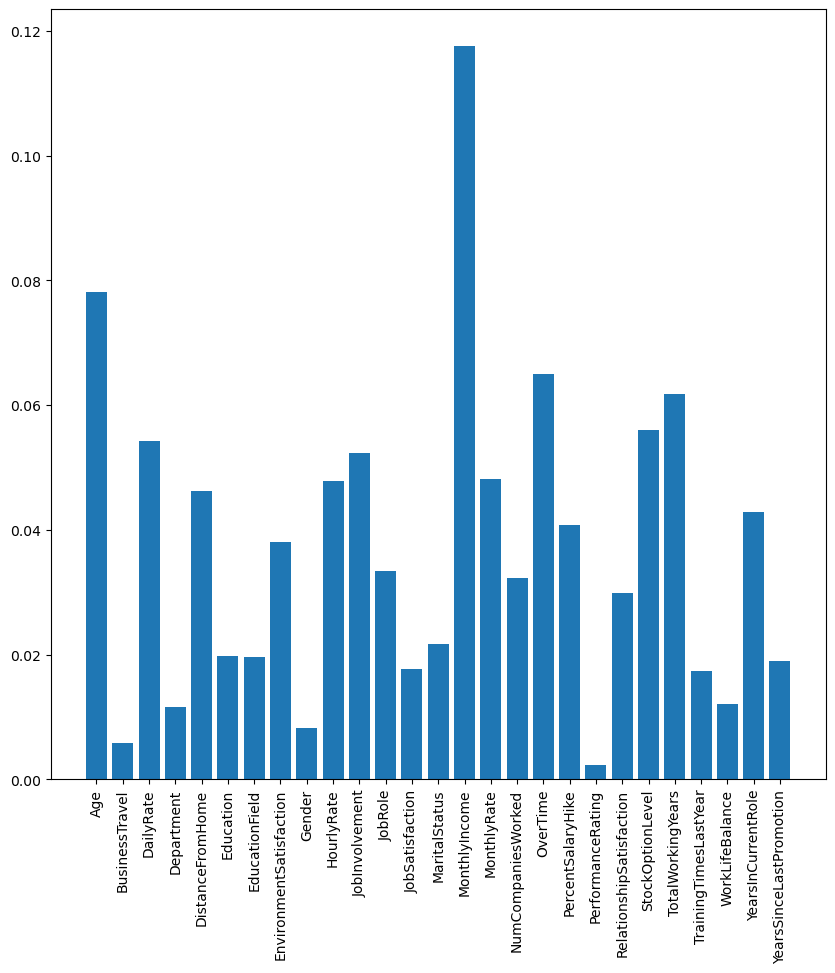

In [37]:
#ploting feature importance to help the business needs
importance = clf.feature_importances_

feature_names = X_train.columns

plt.figure(figsize=(10,10))
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), feature_names, rotation=90)
plt.rcParams.update({'font.size': 10}) 
plt.show()

In [64]:
#xgboost hyperparameter tuning
param_grid = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [3,4],
    'n_estimators': [100,200],
    'gamma': [2,5],
    'subsample':[0.5,0.8]
    
}   


xgb = XGBClassifier()

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, cv=3,verbose=10,return_train_score=True)
grid_search.fit(X_train,y_train)

print(grid_search.best_params_)
#print("Best hyperparameters: ", grid_search.best_params_)



Fitting 3 folds for each of 32 candidates, totalling 96 fits
{'gamma': 5, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}


In [65]:
param_xgb = {
    'learning_rate': 0.05,
    'max_depth': 4,
    'n_estimators': 200,
    'gamma': 5,
    'subsample':0.8
}  

xgb = XGBClassifier(**param_xgb)
  
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict_proba(X_test)[:, 1]
print(f"ROC AUC SCORE: {roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])}")
print(f"F1 SCORE: {f1_score(y_test,xgb.predict(X_test), average='weighted')}\n\n")

ROC AUC SCORE: 0.8063654033041787
F1 SCORE: 0.8604337488950529




In [66]:
#finding optimal threshold for XGB
thresholds = np.arange(0.1, 0.4, 0.01)
best_score = 0.0
best_threshold = 0.0


for threshold in thresholds:
    y_pred_xgb = (y_pred_xgb >= threshold).astype(int)
    score = roc_auc_score(y_test, y_pred_xgb)
    
    
    if score > best_score:
        best_score = score
        best_threshold = threshold


print("Best score:", best_score)
print("Best threshold:", best_threshold)

Best score: 0.7551020408163265
Best threshold: 0.1


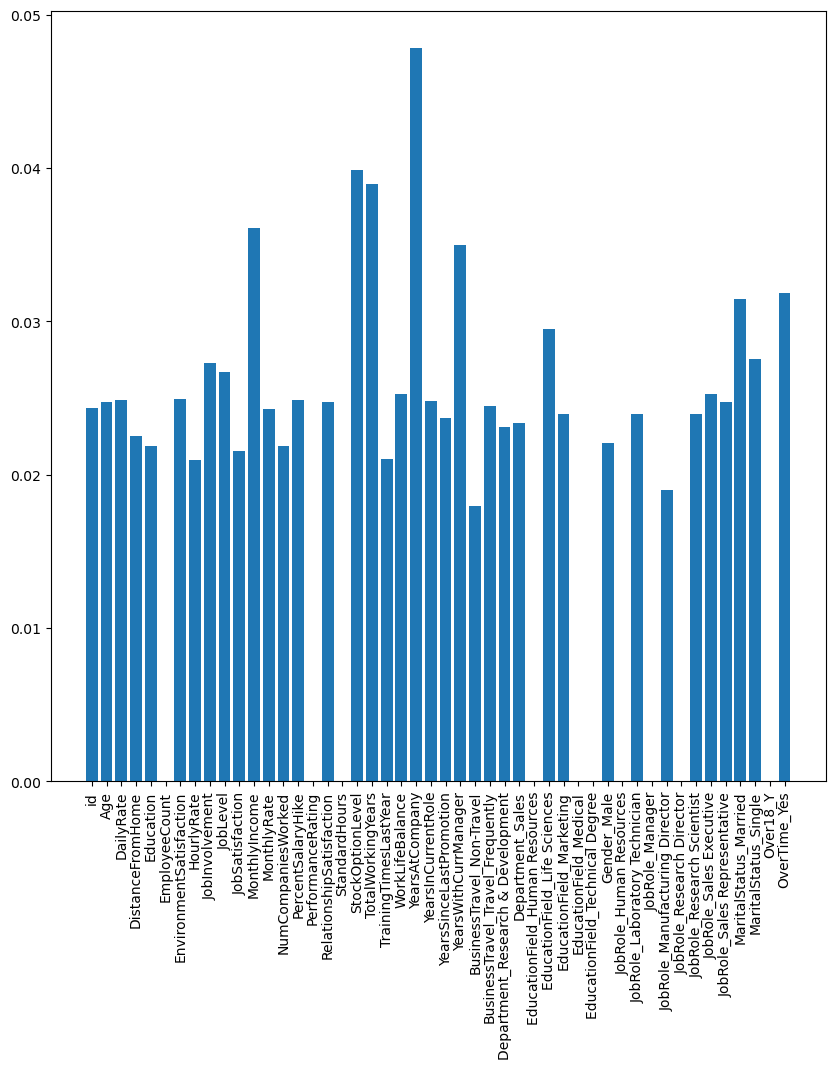

In [67]:
#ploting feature importance to help the business needs
importance = xgb.feature_importances_

feature_names = X_train.columns

plt.figure(figsize=(10,10))
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), feature_names, rotation=90)
plt.rcParams.update({'font.size': 10}) 
plt.show()

***Due to the unbalanced nature of the dataset, let's attempt some bagging now. We will run many smaller models where the unbalanced data can be shuffled in a way so that the model does not undersample the 1s***

In [41]:
#re-combining our X_train and y_train, so that we can create mini versions of each to train a few smaller models and combine their predictive power
combined_train = pd.concat([X_train, y_train], axis=1)
all_ones = combined_train[combined_train["Attrition"] == 1]

In [42]:
# the desired size of each training set
train_size = len(all_ones*2)

#copy of the train data to drop from here
all_zeros = combined_train[combined_train["Attrition"] == 0].copy()

# create a dataframe to maintain the predictions
predictions_df = pd.DataFrame()

# Initializing the mean_roc
mean_roc = 0


#used 6 different runs in this case
for i in range(6):
    
    print(f"Iteration {i+1}:")

    # get a random sample of all zeros. This will be  used to train alongside the all_ones
    random_sample = all_zeros.sample(n = train_size)
    
    #drop the already used rows of the current sample to avoid them being used again
    all_zeros.drop(random_sample.index, inplace = True)

    # combine all_ones and random_sample to create the training set
    df = pd.concat([all_ones, random_sample])

    
    # split into training and test sets into mini X_train and y_trains
    X_mini = df.drop(columns = "Attrition")
    y_mini = df["Attrition"]
    
    param_grid_rfc_mini = {
    'bootstrap': [True, False],
    'max_depth': [10,12,16,18, 21],
    'n_estimators': [100,200, 500],
    'min_samples_leaf': [2,5],
    'max_features': ['sqrt']
        }   



    rfc = RandomForestClassifier(random_state=55)
    
    #running a mini grid search over each bag to hypertune each bagged model
    grid_search_rfc_bag = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc_mini, scoring='roc_auc', n_jobs=-1, cv=3,verbose=10,return_train_score=True)
    grid_search_rfc_bag.fit(X_mini,y_mini)  
    

    # make predictions on the validation set
    y_pred = grid_search_rfc_bag.predict_proba(X_test)[:, 1]
    
    # add the predictions to the predictions dataframe
    predictions_df[f"run{i+1}"] = y_pred

    # calculate various metrics
    print(f"ROC AUC SCORE: {roc_auc_score(y_test, grid_search_rfc_bag.predict_proba(X_test)[:, 1])}")
    mean_roc += roc_auc_score(y_test, grid_search_rfc_bag.predict_proba(X_test)[:, 1])
    print(f"F1 SCORE: {f1_score(y_test,grid_search_rfc_bag.predict(X_test), average='weighted')}\n\n")
    
print(f"The final mean ROC AUC is: {mean_roc/(i+1)}")

    

Iteration 1:
Fitting 3 folds for each of 60 candidates, totalling 180 fits
ROC AUC SCORE: 0.818951048951049
F1 SCORE: 0.766201515098458


Iteration 2:
Fitting 3 folds for each of 60 candidates, totalling 180 fits
ROC AUC SCORE: 0.8173426573426573
F1 SCORE: 0.7826434277414669


Iteration 3:
Fitting 3 folds for each of 60 candidates, totalling 180 fits
ROC AUC SCORE: 0.8088111888111887
F1 SCORE: 0.8011904761904763


Iteration 4:
Fitting 3 folds for each of 60 candidates, totalling 180 fits
ROC AUC SCORE: 0.7975524475524475
F1 SCORE: 0.7813059033989267


Iteration 5:
Fitting 3 folds for each of 60 candidates, totalling 180 fits
ROC AUC SCORE: 0.8231468531468532
F1 SCORE: 0.7869767076411414


Iteration 6:
Fitting 3 folds for each of 60 candidates, totalling 180 fits
ROC AUC SCORE: 0.7929370629370629
F1 SCORE: 0.800675059295749


The final mean ROC AUC is: 0.8097902097902098


In [43]:
predictions_df

run1      run2      run3      run4      run5      run6
0    0.599205  0.721087  0.617523  0.773144  0.702392  0.676849
1    0.323003  0.292840  0.395596  0.341030  0.348418  0.248072
2    0.300675  0.304718  0.334803  0.430870  0.352536  0.464314
3    0.407021  0.494661  0.445430  0.449952  0.473114  0.384831
4    0.526488  0.453924  0.560272  0.629532  0.516527  0.520767
..        ...       ...       ...       ...       ...       ...
331  0.328642  0.173036  0.309994  0.152177  0.190337  0.289311
332  0.270379  0.295748  0.381732  0.377294  0.357672  0.374382
333  0.592351  0.521289  0.551533  0.603854  0.550210  0.627821
334  0.681529  0.808327  0.662349  0.636524  0.669542  0.660456
335  0.311154  0.342181  0.379515  0.318228  0.324051  0.313436

[336 rows x 6 columns]

In [44]:
mean_predictions_rfc = predictions_df.mean(axis=1)
mean_predictions_rfc

0      0.681700
1      0.324826
2      0.364653
3      0.442502
4      0.534585
         ...   
331    0.240583
332    0.342868
333    0.574510
334    0.686455
335    0.331428
Length: 336, dtype: float64

In [45]:
thresholds = np.arange(0.4, 0.65, 0.01)
best_score = 0.0
best_threshold = 0.0


for threshold in thresholds:
    y_pred_rfc = (mean_predictions_rfc >= threshold).astype(int)
    score = roc_auc_score(y_test, y_pred_rfc)
    
    
    if score > best_score:
        best_score = score
        best_threshold = threshold


print("Best score:", best_score)
print("Best threshold:", best_threshold)

Best score: 0.7773426573426573
Best threshold: 0.5300000000000001


Now trying out the xgboost

In [46]:
# the desired size of each training set
train_size = len(all_ones*2)

#copy of the train data to drop from here
all_zeros = combined_train[combined_train["Attrition"] == 0].copy()

# create a dataframe to maintain the predictions
predictions_df = pd.DataFrame()

# Initializing the mean_roc
mean_roc = 0


#used 6 different runs in this case

for i in range(6):
    
    print(f"Iteration {i+1}:")

    # get a random sample of all zeros. This will be  used to train alongside the all_ones
    random_sample = all_zeros.sample(n = train_size, random_state = 39)
    
    #drop the already used rows of the current sample to avoid them being used again
    all_zeros.drop(random_sample.index, inplace = True)

    # combine all_ones and random_sample to create the training set
    df = pd.concat([all_ones, random_sample])

    
    # split into training and test sets into mini X_train and y_trains
    X_mini = df.drop(columns = "Attrition")
    y_mini = df["Attrition"]
    
    param_grid_xgb_mini = {
    'learning_rate': [0.01,0.1],
    'max_depth': [3,5],
    'n_estimators': [100,300],
    'gamma': [2,5],
    'subsample':[0.5,0.2]
    }   
    
    xgb = XGBClassifier(random_state =55)
    
    #running a mini grid search over each bag to hypertune each bagged model
    grid_search_xgb_bag = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb_mini, scoring='roc_auc', n_jobs=-1, cv=3,verbose=10,return_train_score=True)
    grid_search_xgb_bag.fit(X_mini,y_mini)  
    
    # make predictions on the validation set
    y_pred = grid_search_xgb_bag.predict_proba(X_test)[:, 1]
    
    # add the predictions to the predictions dataframe
    predictions_df[f"run{i+1}"] = y_pred

    # calculate various metrics
    print(f"ROC AUC SCORE: {roc_auc_score(y_test, grid_search_xgb_bag.predict_proba(X_test)[:, 1])}")
    mean_roc += roc_auc_score(y_test, grid_search_xgb_bag.predict_proba(X_test)[:, 1])
    print(f"F1 SCORE: {f1_score(y_test,grid_search_xgb_bag.predict(X_test), average='weighted')}\n\n")
    
print(f"The final mean ROC AUC is: {mean_roc/(i+1)}")

    

Iteration 1:
Fitting 3 folds for each of 32 candidates, totalling 96 fits
ROC AUC SCORE: 0.7930769230769231
F1 SCORE: 0.7802561488876529


Iteration 2:
Fitting 3 folds for each of 32 candidates, totalling 96 fits
ROC AUC SCORE: 0.7506293706293707
F1 SCORE: 0.7539483333535915


Iteration 3:
Fitting 3 folds for each of 32 candidates, totalling 96 fits
ROC AUC SCORE: 0.7913286713286714
F1 SCORE: 0.7718563988095236


Iteration 4:
Fitting 3 folds for each of 32 candidates, totalling 96 fits
ROC AUC SCORE: 0.8097902097902098
F1 SCORE: 0.8087942794918681


Iteration 5:
Fitting 3 folds for each of 32 candidates, totalling 96 fits
ROC AUC SCORE: 0.8274125874125875
F1 SCORE: 0.7897928784224713


Iteration 6:
Fitting 3 folds for each of 32 candidates, totalling 96 fits
ROC AUC SCORE: 0.7978321678321678
F1 SCORE: 0.7930787408199669


The final mean ROC AUC is: 0.7950116550116549


In [47]:
predictions_df

run1      run2      run3      run4      run5      run6
0    0.655356  0.508069  0.590394  0.667174  0.583484  0.739055
1    0.210588  0.416114  0.155978  0.359806  0.227311  0.238819
2    0.084313  0.450227  0.194276  0.337875  0.322861  0.100322
3    0.167635  0.575161  0.511995  0.483563  0.331246  0.365758
4    0.487604  0.543853  0.492370  0.593278  0.611324  0.459680
..        ...       ...       ...       ...       ...       ...
331  0.075793  0.286320  0.226895  0.335173  0.197868  0.197371
332  0.149350  0.460128  0.231778  0.242840  0.412611  0.123476
333  0.603907  0.567849  0.674436  0.707009  0.631104  0.665098
334  0.927850  0.663819  0.767523  0.808412  0.769416  0.971766
335  0.238565  0.465566  0.207863  0.307317  0.237280  0.266658

[336 rows x 6 columns]

In [48]:
mean_predictions_xgboost = predictions_df.mean(axis=1)
mean_predictions_xgboost

0      0.623922
1      0.268103
2      0.248312
3      0.405893
4      0.531351
         ...   
331    0.219903
332    0.270030
333    0.641567
334    0.818131
335    0.287208
Length: 336, dtype: float32

In [49]:
thresholds = np.arange(0.4, 0.65, 0.01)
best_score = 0.0
best_threshold = 0.0


for threshold in thresholds:
    y_pred_xg = (mean_predictions_xgboost >= threshold).astype(int)
    score = roc_auc_score(y_test, y_pred_xg)
    
    
    if score > best_score:
        best_score = score
        best_threshold = threshold


print("Best score:", best_score)
print("Best threshold:", best_threshold)

Best score: 0.7671328671328671
Best threshold: 0.4700000000000001


In [50]:
#both models combined
thresholds = np.arange(0.4, 0.65, 0.01)
proba_combined_bag = np.mean([mean_predictions_xgboost, mean_predictions_rfc], axis=0)
best_score = 0.0
best_threshold = 0.0


for threshold in thresholds:
    y_pred_combined_bag = (proba_combined_bag >= threshold).astype(int)
    score = roc_auc_score(y_test, y_pred_combined_bag)
    
    
    if score > best_score:
        best_score = score
        best_threshold = threshold


print("Best score:", best_score)
print("Best threshold:", best_threshold)

Best score: 0.7825874125874126
Best threshold: 0.5400000000000001


Now the moment of truth...we predict on the test

# 4. Final Prediction

In [68]:

data_test_id = data_test["id"]
data_test = data_test.drop(columns=["id","StandardHours", "EmployeeCount", "Over18","JobLevel", "YearsAtCompany", "YearsWithCurrManager"])

#applying the same rule on data_test
q1, q3 = np.percentile(data_test["DailyRate"], [25, 75])
iqr = q3 - q1


lower_clip = q1 - 1.5 * iqr
upper_clip = q3 + 1.5 * iqr

# Clip the outliers
data_test["DailyRate"] = np.clip(data_test["DailyRate"], lower_clip, upper_clip)



In [69]:
# the desired size of each training set
train_size = len(all_ones*2)

#copy of the train data to drop from here
all_zeros = combined_train[combined_train["Attrition"] == 0].copy()

# create a dataframe to maintain the predictions
predictions_df = pd.DataFrame()

# Initializing the mean_roc
mean_roc = 0


#used 6 different runs in this case

for i in range(6):
    
    print(f"Iteration {i+1}:")

    # get a random sample of all zeros. This will be  used to train alongside the all_ones
    random_sample = all_zeros.sample(n = train_size)
    
    #drop the already used rows of the current sample to avoid them being used again
    all_zeros.drop(random_sample.index, inplace = True)

    # combine all_ones and random_sample to create the training set
    df = pd.concat([all_ones, random_sample])

    
    # split into training and test sets into mini X_train and y_trains
    X_mini = df.drop(columns = "Attrition")
    y_mini = df["Attrition"]
    
    param_grid_xgb_mini = {
    'learning_rate': [0.01,0.1],
    'max_depth': [3,5],
    'n_estimators': [100,300],
    'gamma': [2,5],
    'subsample':[0.5,0.2]
    }   
    
    xgb = XGBClassifier(random_state =55)
    
    #running a mini grid search over each bag to hypertune each bagged model
    grid_search_xgb_bag = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb_mini, scoring='roc_auc', n_jobs=-1, cv=3,verbose=10,return_train_score=True)
    grid_search_xgb_bag.fit(X_mini,y_mini)  
    
    # make predictions on the validation set
    y_pred = grid_search_xgb_bag.predict_proba(data_test)[:, 1]
    
    # add the predictions to the predictions dataframe
    predictions_df[f"run{i+1}"] = y_pred


Iteration 1:
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Iteration 2:
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Iteration 3:
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Iteration 4:
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Iteration 5:
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Iteration 6:
Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [70]:
mean_predictions_xgboost_test = predictions_df.mean(axis=1)
mean_predictions_xgboost_test

0       0.859759
1       0.451221
2       0.469967
3       0.218842
4       0.875541
          ...   
1114    0.394112
1115    0.077742
1116    0.113961
1117    0.182689
1118    0.138255
Length: 1119, dtype: float32

In [71]:
# the desired size of each training set
train_size = len(all_ones*2)

#copy of the train data to drop from here
all_zeros = combined_train[combined_train["Attrition"] == 0].copy()

# create a dataframe to maintain the predictions
predictions_df_rfc = pd.DataFrame()

# Initializing the mean_roc
mean_roc = 0


#used 6 different runs in this case
for i in range(6):
    
    print(f"Iteration {i+1}:")

    # get a random sample of all zeros. This will be  used to train alongside the all_ones
    random_sample = all_zeros.sample(n = train_size)
    
    #drop the already used rows of the current sample to avoid them being used again
    all_zeros.drop(random_sample.index, inplace = True)

    # combine all_ones and random_sample to create the training set
    df = pd.concat([all_ones, random_sample])

    
    # split into training and test sets into mini X_train and y_trains
    X_mini = df.drop(columns = "Attrition")
    y_mini = df["Attrition"]
    
    param_grid_rfc_mini = {
    'bootstrap': [True, False],
    'max_depth': [10,12,16,18, 21],
    'n_estimators': [100,200, 500],
    'min_samples_leaf': [2,5],
    'max_features': ['sqrt']
        }   



    rfc = RandomForestClassifier(random_state=55)
    
    #running a mini grid search over each bag to hypertune each bagged model
    grid_search_rfc_bag = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc_mini, scoring='roc_auc', n_jobs=-1, cv=3,verbose=10,return_train_score=True)
    grid_search_rfc_bag.fit(X_mini,y_mini)  

    # make predictions on the validation set
    y_pred = grid_search_rfc_bag.predict_proba(data_test)[:, 1]
    
    # add the predictions to the predictions dataframe
    predictions_df_rfc[f"run{i+1}"] = y_pred



Iteration 1:
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Iteration 2:
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Iteration 3:
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Iteration 4:
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Iteration 5:
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Iteration 6:
Fitting 3 folds for each of 60 candidates, totalling 180 fits


In [72]:
mean_predictions_rfc_test = predictions_df.mean(axis=1)
mean_predictions_rfc_test

0       0.859759
1       0.451221
2       0.469967
3       0.218842
4       0.875541
          ...   
1114    0.394112
1115    0.077742
1116    0.113961
1117    0.182689
1118    0.138255
Length: 1119, dtype: float32

In [73]:
#both models combined

combined_model = np.mean([mean_predictions_xgboost_test, mean_predictions_rfc_test], axis=0)

#threshold obtained from training set optimal ROC score run
threshold = .52

final_predictions = (combined_model >= threshold).astype(int)
results_final = pd.DataFrame({'id': data_test_id, 'Attrition': final_predictions})
results_final


id  Attrition
0     1677          1
1     1678          0
2     1679          0
3     1680          0
4     1681          1
...    ...        ...
1114  2791          0
1115  2792          0
1116  2793          0
1117  2794          0
1118  2795          0

[1119 rows x 2 columns]

In [ ]:
results_final.to_csv("ml_upload.csv", index= False)

***We run the test a single time to see the validity of the model***

***Private Score: 79%***

***We are good to launch!!!!***

# BACKUP: FAILED EXPERIMENTS

## LOGISTIC REGRESSION

In [51]:
#So we start over again with our X and y, instead of label encoding we will have to use something like one hot encoding

data_v2 = pd.read_csv("mlgroup_train.csv")
X = data_v2.drop(columns = "Attrition")
y = data_v2["Attrition"]


In [52]:
#using get_dummies to one hot encode all the categorical variables
X_new= pd.get_dummies(X)
X_new = X_new.drop(columns = ["BusinessTravel_Travel_Rarely" , "Department_Human Resources", "EducationField_Other","Gender_Female","JobRole_Healthcare Representative","MaritalStatus_Divorced","OverTime_No"])

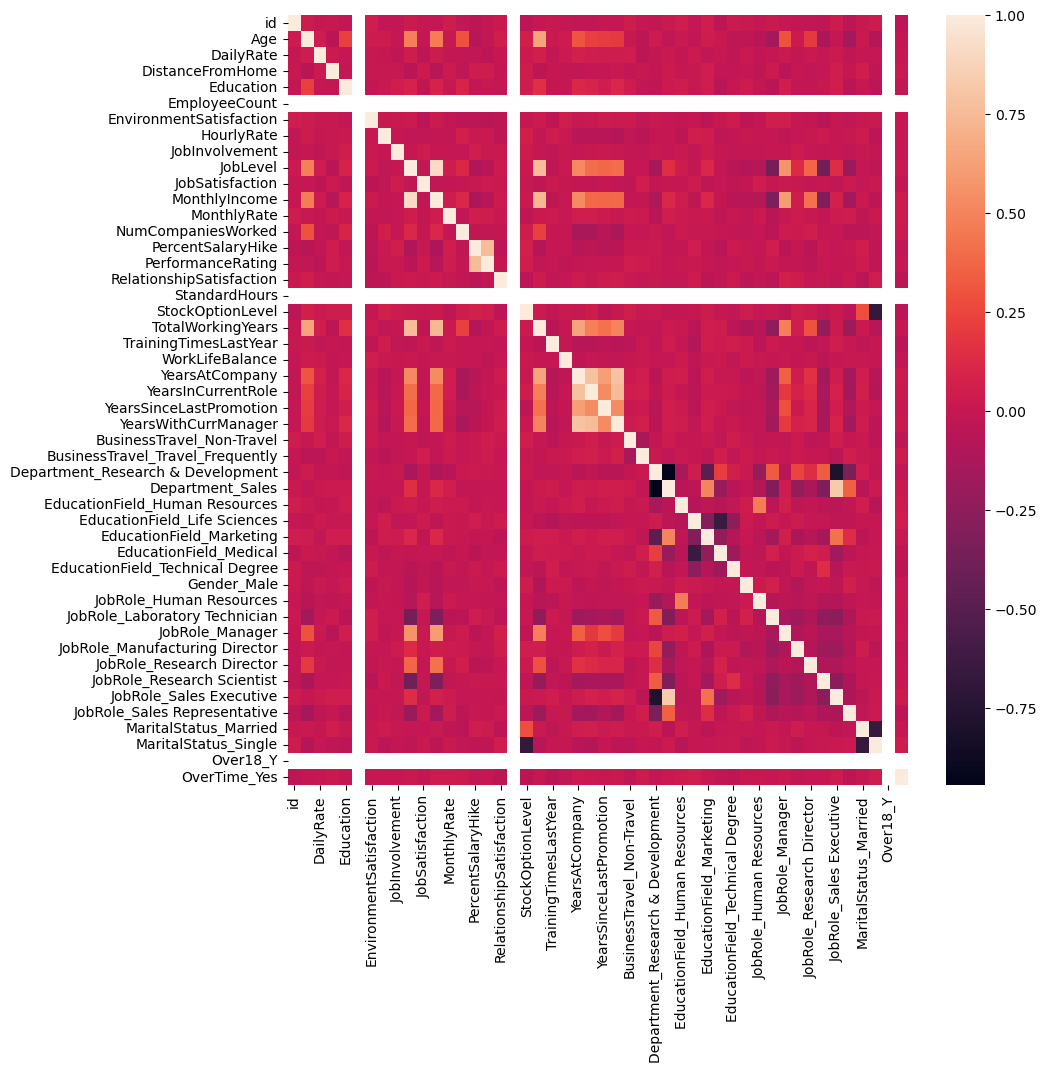

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X_new.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr)

plt.show()

In [54]:
#will split into train and test and then scale the data before applying PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(
    X_new, y,               
    test_size=0.2,      
    random_state=194,   
    shuffle=True,       
    stratify=None       
)

scl = StandardScaler()
X_train_sc = scl.fit_transform(X_train)


X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)


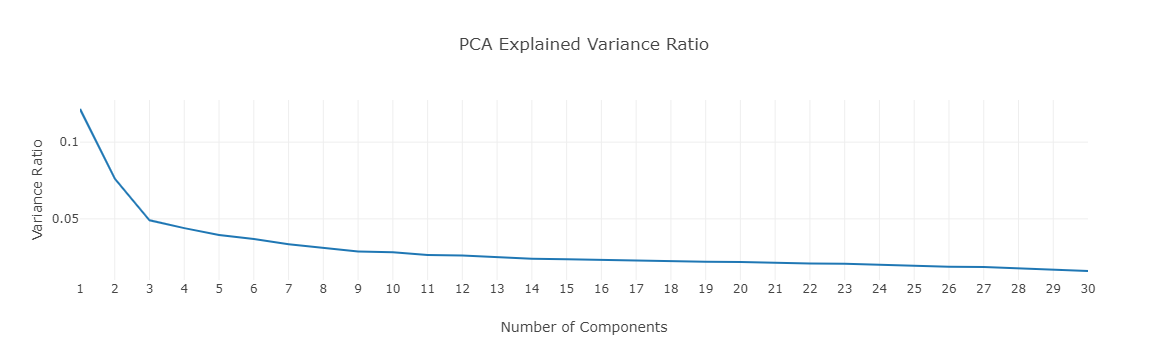

In [55]:
#let's try PCA to deal with the correlation. This is taken from Daniel's code from Python

from sklearn.decomposition import PCA

pca = PCA(n_components=30)
pca.fit(X_train_sc)
exp_variance = pd.Series(pca.explained_variance_ratio_, name="Explained Var. Ratio")

fig = px.line(x=range(1,31), y=exp_variance, title="PCA Explained Variance Ratio", template="none")
fig.update_xaxes(title="Number of Components", tickmode = 'array', tickvals = list(range(1,31)))
fig.update_yaxes(title="Variance Ratio")

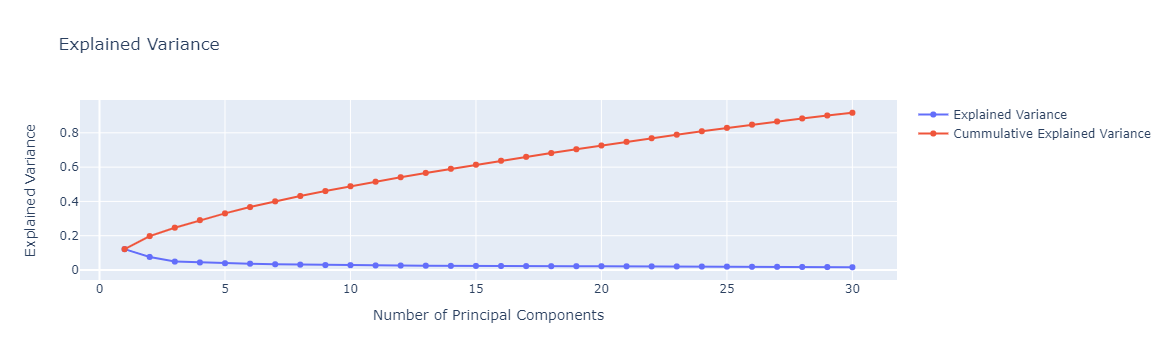

In [56]:
# plotly chart of explained variance. This is taken from Daniel's code from Python
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=np.arange(1, len(pca.explained_variance_ratio_) + 1),
    y=pca.explained_variance_ratio_,
    mode="lines+markers",
    name="Explained Variance"
))
fig.add_trace(go.Scatter(
    x=np.arange(1, len(pca.explained_variance_ratio_) + 1),
    y=np.cumsum(pca.explained_variance_ratio_),
    mode="lines+markers",
    name="Cummulative Explained Variance"
))
fig.update_layout(title="Explained Variance", xaxis_title="Number of Principal Components", yaxis_title="Explained Variance")
fig.show()

In [57]:
#we will try with 27 PCA components
pca = PCA(n_components=27)
X_train_sc_pca = pca.fit_transform(X_train_sc)





X_train_sc_pca = pd.DataFrame(X_train_sc_pca)

X_train_sc_pca.head()

0         1         2         3         4         5         6   \
0  2.511679  2.074449 -1.722761 -1.571321  0.020727  1.135584 -1.261158   
1  1.437793  2.188127  0.483415 -1.519228  1.597181 -1.649217 -0.076828   
2 -3.689214 -0.340602 -1.278561 -0.690340 -1.631776  0.733743 -0.024894   
3  1.435416 -1.398948  1.795528 -1.716799  0.574579  1.574662 -1.360719   
4  5.837675 -2.354544  0.456709  0.706703  1.481627 -0.717187  0.126528   

         7         8         9   ...        17        18        19        20  \
0 -0.033467  0.059411 -1.674612  ...  0.038123 -0.048940 -1.429734 -0.227024   
1 -1.101058  1.583310  0.198690  ...  1.780529  0.816372  0.026156  0.644324   
2 -1.352984  0.024553 -0.705215  ... -0.422558  2.195119 -0.505151  0.347770   
3  1.009233  2.045623 -0.949012  ... -0.349089 -0.706535  0.371292  0.032566   
4 -1.031441 -0.689175 -1.939494  ...  1.113939  1.024935 -1.624378 -0.776357   

         21        22        23        24        25        26  
0 -2.068054 -0.001101 -1.171038  2.022560 -0.870961 -0.432315  
1 -0.960578 -0.848642 -0.389577 -1.138802 -1.616263 -0.174344  
2  1.172468  1.334553  2.122566 -0.137322  1.341552 -0.281524  
3  2.705979 -1.348705 -1.011023  0.393337 -1.750750 -1.455323  
4  0.044925  0.774862 -0.506108  0.522449 -0.707612  0.600961  

[5 rows x 27 columns]

In [58]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_sc_pca, y_train)

LogisticRegression()

In [59]:
#transforming our X_test with the scaling and pca that was fitted to our X_train
X_test_scaled = scl.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)


C:\Users\dilha\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



In [60]:
proba_logistic = logreg.predict_proba(X_test_pca)[:,1]

thresholds = np.arange(0.1, 0.4, 0.01)
best_score = 0.0
best_threshold = 0.0


for threshold in thresholds:
    y_pred_logistic = (proba_logistic >= threshold).astype(int)
    score = roc_auc_score(y_test, y_pred_logistic)
    
    
    if score > best_score:
        best_score = score
        best_threshold = threshold


print("Best score:", best_score)
print("Best threshold:", best_threshold)

Best score: 0.773809523809524
Best threshold: 0.14999999999999997


It is not so bad, however we are losing too much explainability with this model due to using PCA